===========iteration:0===========
SGD:2.352716633957231
Momentum:2.364487063380319
AdaGrad:2.2640650891841636
Adam:2.180606662417856
===========iteration:100===========
SGD:1.4492239715394968
Momentum:0.4026818122846011
AdaGrad:0.19445927858612583
Adam:0.35560401344529213
===========iteration:200===========
SGD:0.6108197866200626
Momentum:0.20278510159584287
AdaGrad:0.049597968315311325
Adam:0.11731573629055611
===========iteration:300===========
SGD:0.4196281474743644
Momentum:0.12713893276124213
AdaGrad:0.04688658461502866
Adam:0.10715744258056104
===========iteration:400===========
SGD:0.4479171156596451
Momentum:0.27010766297693545
AdaGrad:0.1343985547101474
Adam:0.22794933632055236
===========iteration:500===========
SGD:0.514235273037599
Momentum:0.29306306439244467
AdaGrad:0.12633304093134018
Adam:0.21875827281645804
===========iteration:600===========
SGD:0.41525645933023714
Momentum:0.12524593210909582
AdaGrad:0.05370488906999687
Adam:0.056851824620247654
===========iteration:

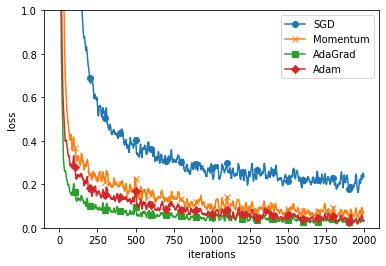

In [1]:
import os
import sys
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *


# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []    


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()